1. Neural network horse race

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
wines = pd.read_csv('data/strongdrink.txt')

In [3]:
wines.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(a)

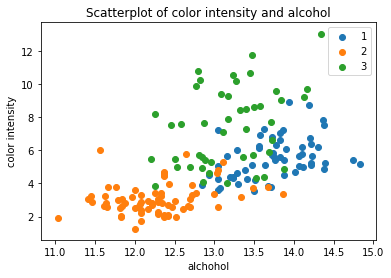

In [4]:
fig, ax = plt.subplots()
for type in [1, 2, 3]:
    data = wines[wines['cultivar'] == type]
    ax.scatter(data.alco, data.color_int, label = type)

ax.legend()
plt.xlabel('alchohol')
plt.ylabel('color intensity')
plt.title("Scatterplot of color intensity and alcohol")
plt.show()

(b)

In [5]:
X_vars = wines[['alco', 'malic', 'tot_phen', 'color_int']]

In [6]:
y_var = wines['cultivar']

In [7]:
param_dist1 = {'penalty': ['l1','l2'],
               'C': sp_uniform(0.1, 10.0)}

In [8]:
lr = LogisticRegression()

In [9]:
rs1 = RandomizedSearchCV(lr, param_distributions = param_dist1,
                         n_iter=200, n_jobs=-1, cv=5, random_state=25,
                         scoring='neg_mean_squared_error')

In [10]:
res1 = rs1.fit(X_vars, y_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
print('RandBestParams1=', res1.best_params_)

RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'}


In [12]:
print('The MSE of the optimal result is ', -res1.best_score_)

The MSE of the optimal result is  0.11931818181818182


(c)

In [13]:
rf = RandomForestClassifier()

In [14]:
param_dist2 = {'n_estimators': [10, 200],
             'max_depth': [2, 4],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20),
             'max_features': sp_randint(1, 4)}
                    

In [15]:
rs2 = RandomizedSearchCV(rf, param_distributions = param_dist2,
                         n_iter=200, n_jobs=-1, cv=5, random_state=25,
                         scoring='neg_mean_squared_error')

In [16]:
res2 = rs2.fit(X_vars, y_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
print('RandBestParams2=', res2.best_params_)

RandBestParams2= {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 6, 'min_samples_split': 18, 'n_estimators': 10}


In [18]:
print('The MSE of the optimal result is ', -res2.best_score_)

The MSE of the optimal result is  0.11363636363636363


(d)

In [19]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False]}

In [20]:
svc = SVC()

In [21]:
rs3 = RandomizedSearchCV(svc, param_distributions = param_dist3,
                         n_iter=200, n_jobs=-1, cv=5, random_state=25,
                         scoring='neg_mean_squared_error')

In [22]:
res3 = rs3.fit(X_vars, y_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
print('RandBestParams3=', res3.best_params_)

RandBestParams3= {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}


In [24]:
print('The MSE of the optimal result is ', -res3.best_score_)

The MSE of the optimal result is  0.14772727272727273


(e)

In [25]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
             'activation': ['logistic', 'relu'],
             'alpha': sp_uniform(0.1, 10.0)}

In [26]:
mlpc = MLPClassifier()

In [27]:
rs4 = RandomizedSearchCV(mlpc, param_distributions = param_dist4,
                         n_iter=200, n_jobs=-1, cv=5, random_state=25,
                         scoring='neg_mean_squared_error')

In [28]:
res4 = rs4.fit(X_vars, y_var)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
print('RandBestParams4=', res4.best_params_)

RandBestParams4= {'activation': 'relu', 'alpha': 3.0723443366017835, 'hidden_layer_sizes': 96}


In [30]:
print('The MSE of the optimal result is ', -res4.best_score_)

The MSE of the optimal result is  0.19886363636363635
